In [ ]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

import model_basic

In [ ]:
def heatmap(model_path):

    model = torch.load(model_path)
    model.eval()
    model.cuda()
    user_emb = model.embed_user_MLP.weight.detach().cpu()
    item_emb = model.embed_item_MLP.weight.detach().cpu()
    user_num = user_emb.shape[0]
    item_num = item_emb.shape[0]
    pred_mtx = np.zeros((user_num, item_num))

    for user in range(user_num):
        pos_score, _ = model(torch.tensor([user]*item_num).cuda(), torch.tensor(list(range(item_num))).cuda(), torch.tensor(list(range(item_num))).cuda())
        pred_mtx[user,:] = pos_score.cpu().detach()
        
    ax = plt.axes()
    sns.heatmap(pred_mtx)
    ax.set_xlabel('Item Index')
    ax.set_ylabel('User Index')
    ax.xaxis.set_ticks([0, 25, 50, 75, 100, 125, 150, 175, 200], [0, 25, 50, 75, 100, 125, 150, 175, 200])
    ax.yaxis.set_ticks([0, 25, 50, 75, 100, 125, 150, 175, 200], [0, 25, 50, 75, 100, 125, 150, 175, 200])
    plt.show()

# def heatmaps(dataset_idx=3):
#     plt.figure(figsize=(10, 4), dpi=120)
#     plt.subplot(1, 3, 1)
#     heatmap(f'./final_synthetic{dataset_idx}__MF_none_0.8_10.pth')
#     plt.title('none')
#     plt.subplot(1, 3, 2)
#     heatmap(f'./final_synthetic{dataset_idx}__MF_pos2neg2_0.8_10.pth')
#     plt.title('pos2neg2')
#     plt.subplot(1, 3, 3)
#     heatmap(f'./final_synthetic{dataset_idx}__MF_posneg_0.8_10.pth')
#     plt.title('zerosum')

def heatmaps(dataset_idx=3):
    print('None')
    heatmap(f'./final_synthetic{dataset_idx}__MF_none_0.8_10.pth')
    print('Pos2Neg2')
    heatmap(f'./final_synthetic{dataset_idx}__MF_pos2neg2_0.8_10.pth')
    print('Zerosum')
    heatmap(f'./final_synthetic{dataset_idx}__MF_posneg_0.8_10.pth')


None


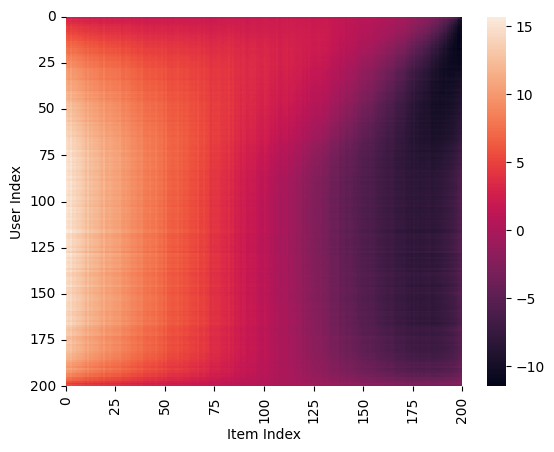

Pos2Neg2


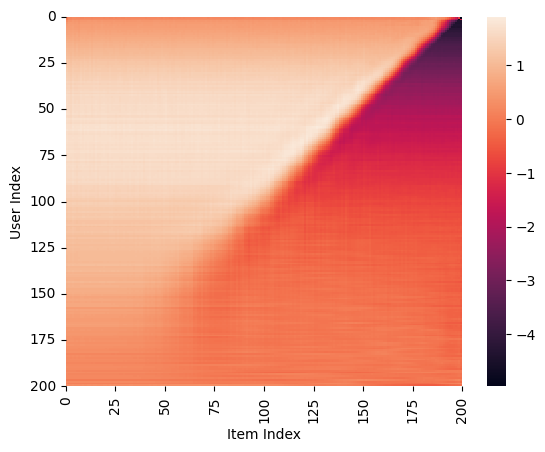

Zerosum


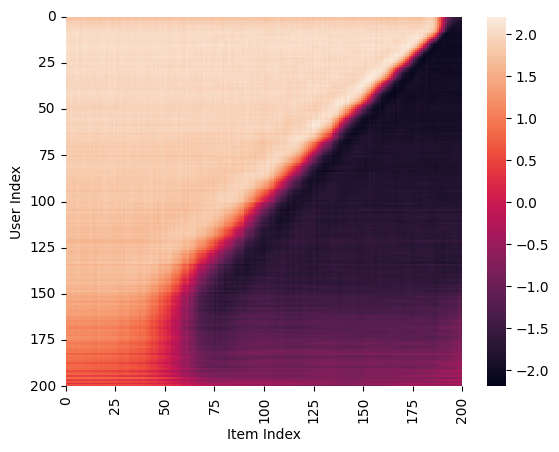

In [ ]:
heatmaps(dataset_idx=3) # item-based

None


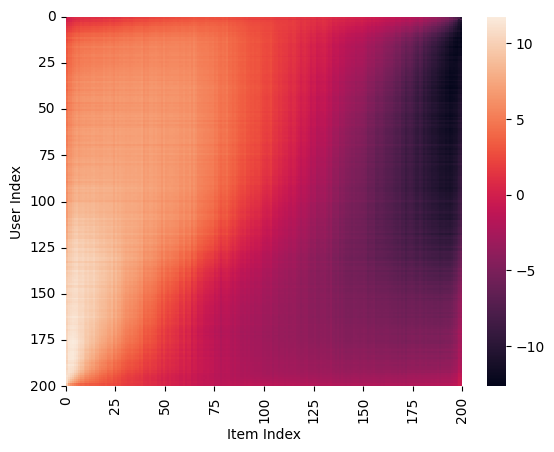

Pos2Neg2


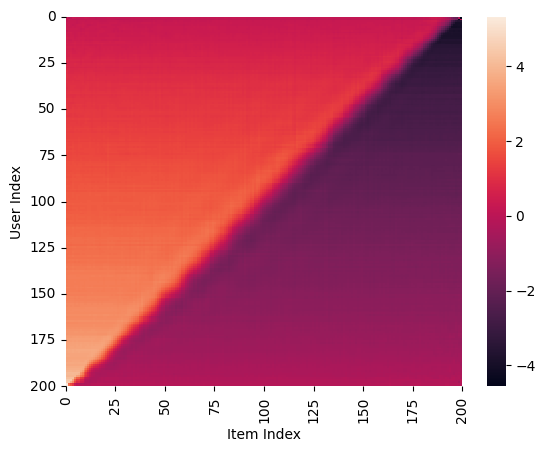

Zerosum


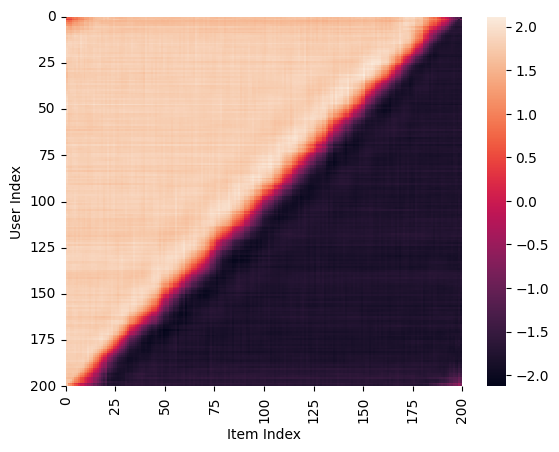

In [ ]:
heatmaps(dataset_idx=1) # user-based

None


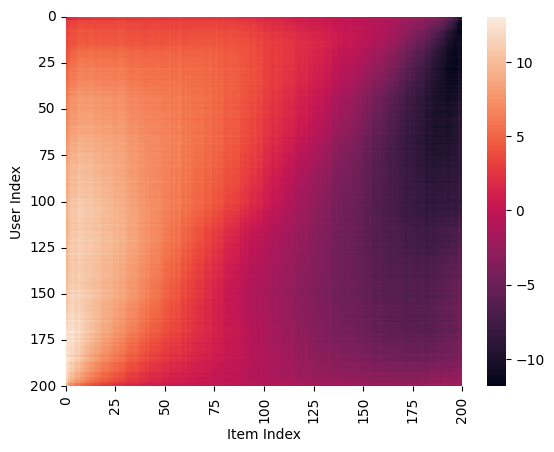

Pos2Neg2


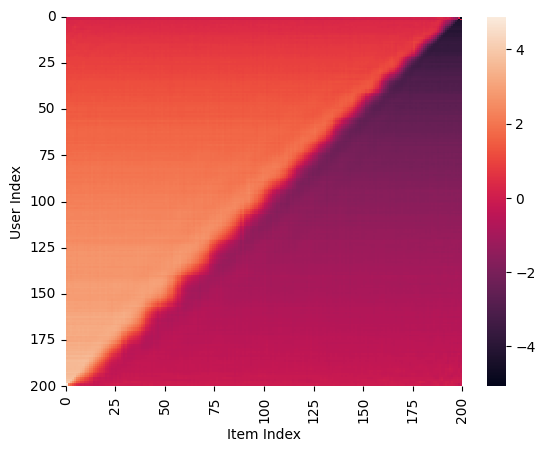

Zerosum


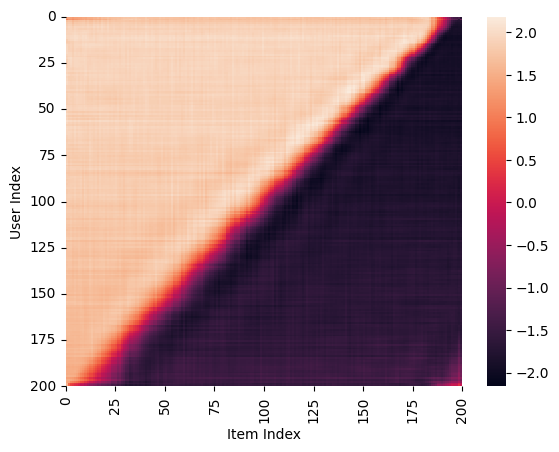

In [ ]:
heatmaps(dataset_idx=2)  # eps = 0.5

None


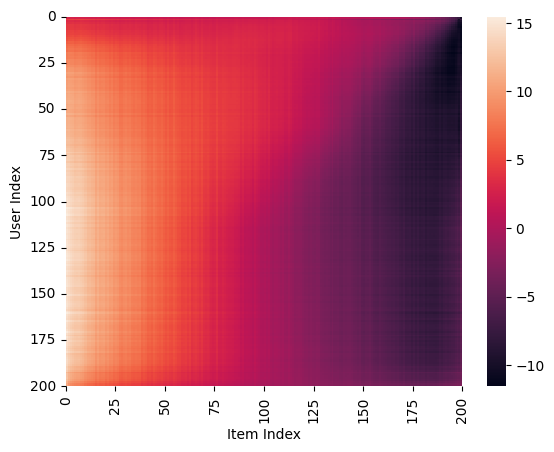

Pos2Neg2


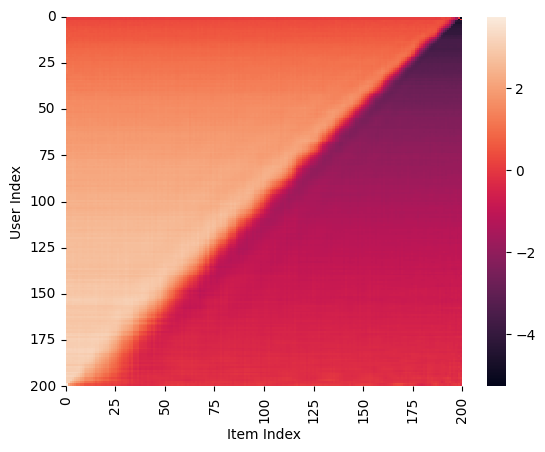

Zerosum


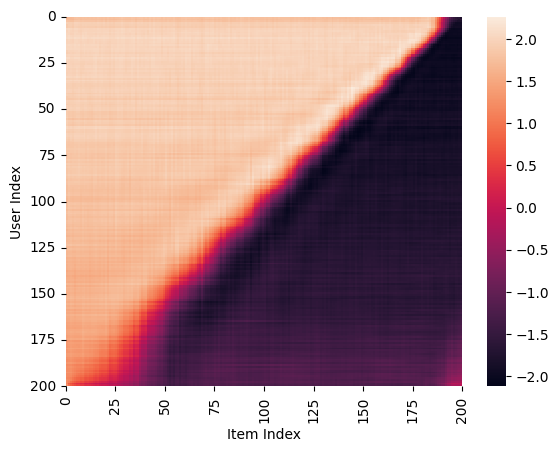

In [ ]:
heatmaps(dataset_idx=0)  # eps = 0.2

In [ ]:
from pop_bias_metrics_basic import *

train_data = pd.read_csv('./total_df')
sid_pop_total = pd.read_csv('./sid_pop_total')

def rank_fig(model_path):

    model = torch.load(model_path)
    model.eval()
    model.cuda()

    fig, axs = plt.subplots(2)
    tmp = pred_item_rank(model, train_data, sid_pop_total)
    axs[0].scatter(tmp.sid, tmp['rank'])
    axs[0].set_ylim([0, 1])
    axs[0].set_xlabel('Item Index')
    axs[0].set_ylabel('Avg Rank Quantile')
    axs[0].set_title('Average Rank Quantile of Items')
    print('Spearman Rank')
    print(stats.spearmanr(tmp.sid, tmp['rank'])[0])

    tmp = pred_item_rankdist(model, train_data, sid_pop_total)
    axs[1].hist(tmp, bins = 25, range = (0,1))[2]
    axs[1].set_ylim([0, 200])
    axs[1].set_xlabel('Popularity Quantile')
    axs[1].set_ylabel('Count')
    axs[1].set_title('Popularity Quantiles of Top Scored Items')
    plt.tight_layout()

    print('Quantile')
    print(tmp.mean())

def rank_figs(dataset_idx=3):
    print('None')
    rank_fig(f'./final_synthetic{dataset_idx}__MF_none_0.8_10.pth')
    print('Pos2Neg2')
    rank_fig(f'./final_synthetic{dataset_idx}__MF_pos2neg2_0.8_10.pth')
    print('Zerosum')
    rank_fig(f'./final_synthetic{dataset_idx}__MF_posneg_0.8_10.pth')

None
Spearman Rank
0.9983735837297575
Quantile
0.002052541651514977
Pos2Neg2
Spearman Rank
0.38780109045269756
Quantile
0.6145453649964167
Zerosum
Spearman Rank
0.49319076471568934
Quantile
0.6759378434389831


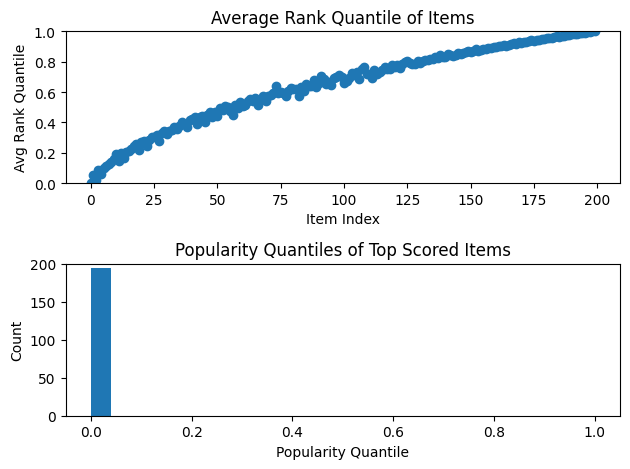

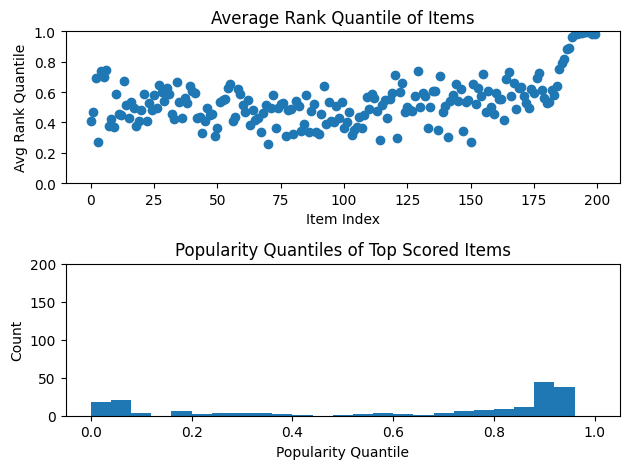

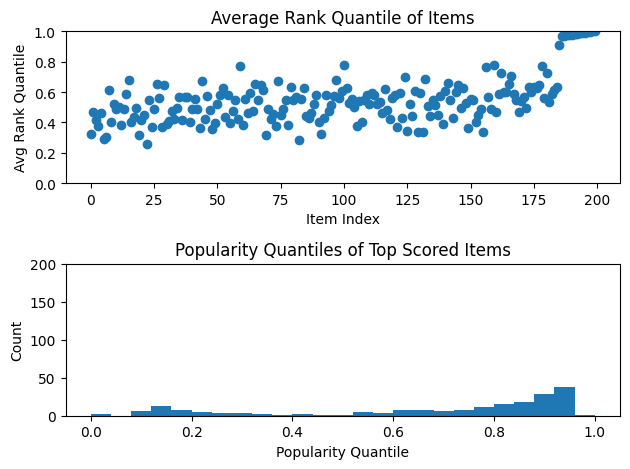

In [ ]:
rank_figs(dataset_idx=3)    # item-based

None
Spearman Rank
0.9918664186104421
Quantile
0.16242657017307374
Pos2Neg2
Spearman Rank
0.46847671191779805
Quantile
0.8145836454040899
Zerosum
Spearman Rank
0.5795299555726635
Quantile
0.7596351487775185


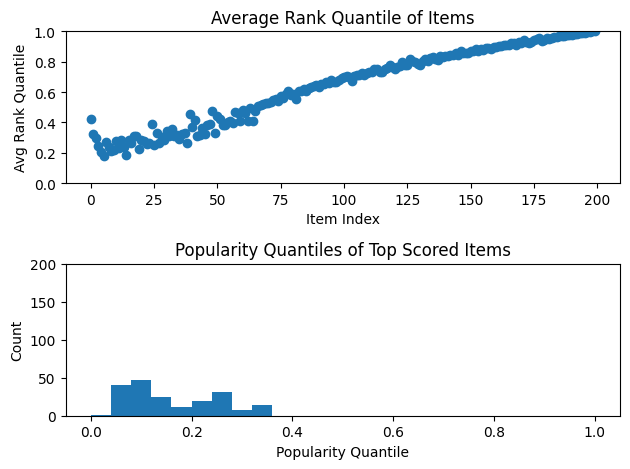

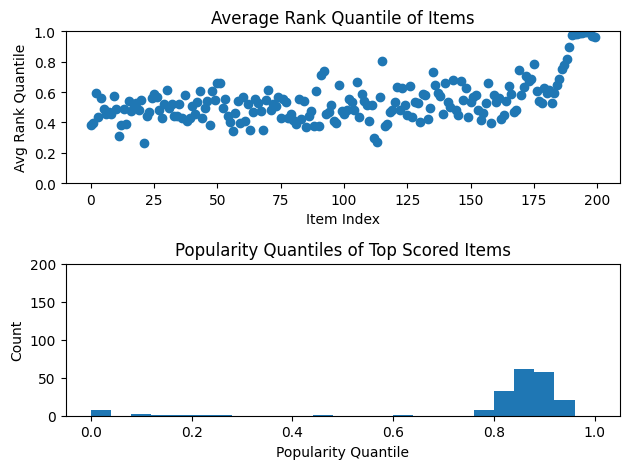

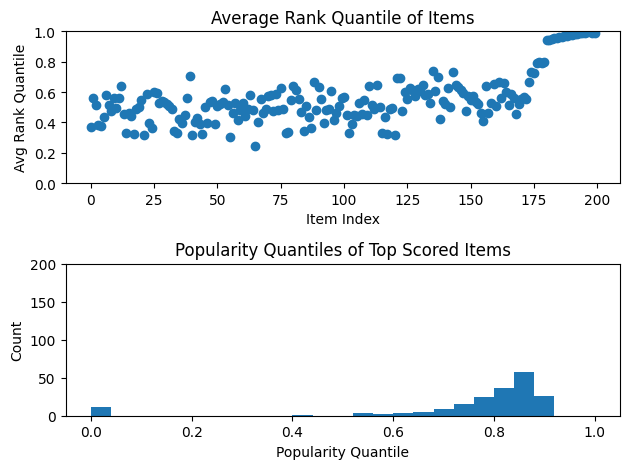

In [ ]:
rank_figs(dataset_idx=1)    # user-based

None
Spearman Rank
0.9918664186104421
Quantile
0.16242657017307374
Pos2Neg2
Spearman Rank
0.46847671191779805
Quantile
0.8145836454040899
Zerosum
Spearman Rank
0.5795299555726635
Quantile
0.7596351487775185


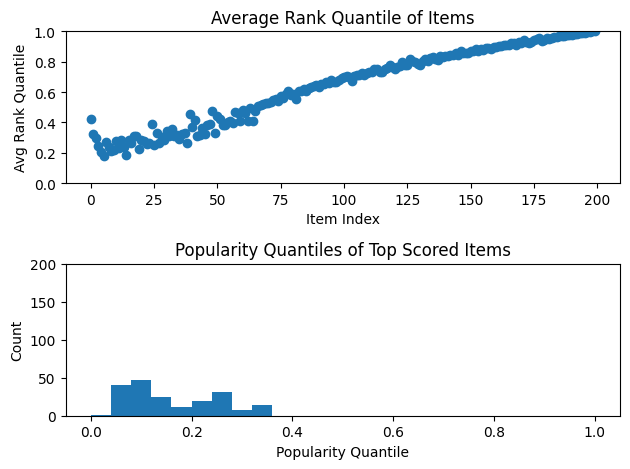

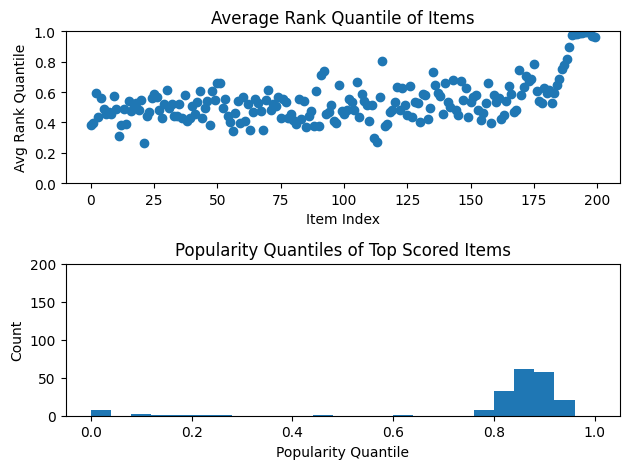

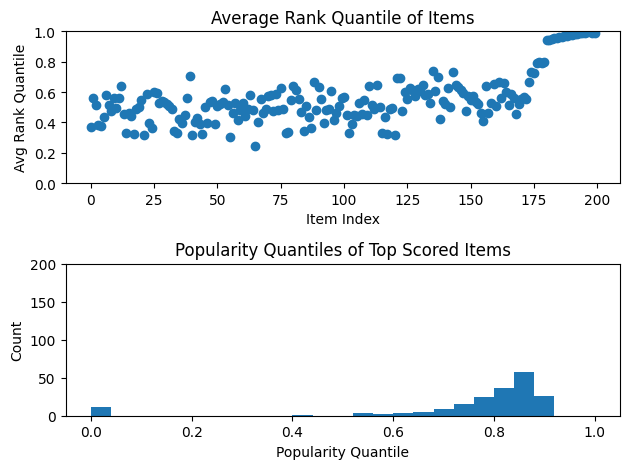

In [ ]:
rank_figs(dataset_idx=2)    # eps = 0.5

None
Spearman Rank
0.9981504537613441
Quantile
0.0032550004940465472
Pos2Neg2
Spearman Rank
0.3897472436810921
Quantile
0.7992768182961812
Zerosum
Spearman Rank
0.4828690028009801
Quantile
0.7013167382440558


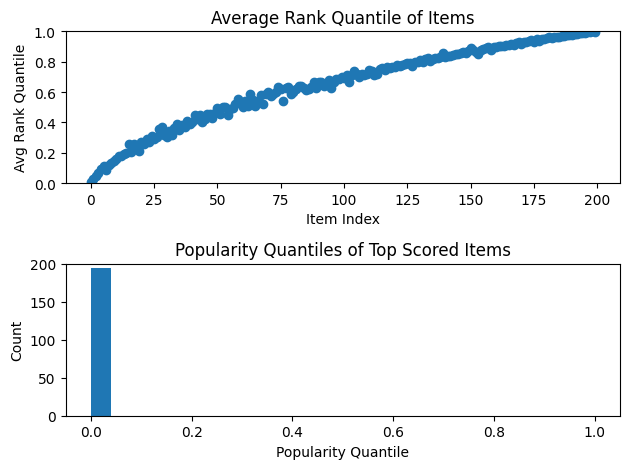

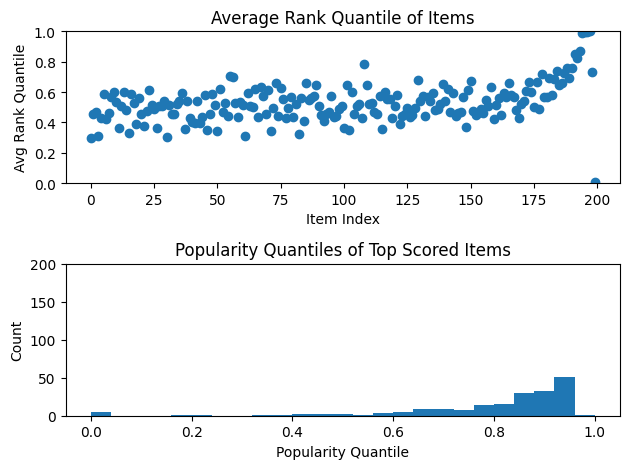

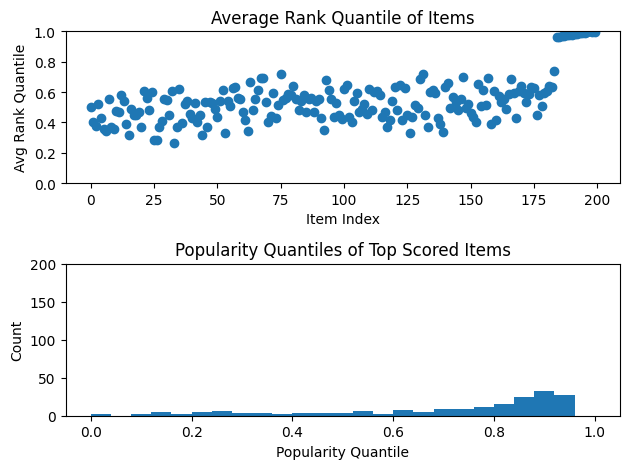

In [ ]:
rank_figs(dataset_idx=0)    # eps = 0.2

In [ ]:
from evaluate_synthetic import metrics_custom_new_bpr

def evaluate(dataset_idx=3):

    print('dataset: id =', dataset_idx)

    print('None')
    model = torch.load(f'./final_synthetic{dataset_idx}__MF_none_0.8_10.pth')
    model.eval()
    model.cuda()
    acc = metrics_custom_new_bpr(model) * 100
    print(f'{100-acc:.4f}')

    print('Pos2Neg2')
    model = torch.load(f'./final_synthetic{dataset_idx}__MF_pos2neg2_0.8_10.pth')
    model.eval()
    model.cuda()
    acc = metrics_custom_new_bpr(model) * 100
    print(f'{100-acc:.4f}')

    print('Zerosum')
    model = torch.load(f'./final_synthetic{dataset_idx}__MF_posneg_0.8_10.pth')
    model.eval()
    model.cuda()
    acc = metrics_custom_new_bpr(model) * 100
    print(f'{100-acc:.4f}')

In [ ]:
evaluate(dataset_idx=3)

dataset: id = 3
None
0.0123
Pos2Neg2
0.0218
Zerosum
0.0085


In [ ]:
evaluate(dataset_idx=1)

dataset: id = 1
None
0.0099
Pos2Neg2
0.0005
Zerosum
0.0002


In [ ]:
evaluate(dataset_idx=2)

dataset: id = 2
None
0.0073
Pos2Neg2
0.0150
Zerosum
0.0005


In [ ]:
evaluate(dataset_idx=0)

dataset: id = 0
None
0.0133
Pos2Neg2
0.0148
Zerosum
0.0022
